In [ ]:
# 필요한 기본 package 불러오기
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import transforms, datasets, utils
from sklearn.datasets import fetch_openml
from torch.utils import data
import matplotlib.pyplot as plt
import numpy as np

# **1. ANN using pytorch for multi-class classification**

In [ ]:
# CUDA 지원 여부 확인 (GPU 있으면 True, 없으면 False)
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

# Hyperparameters
EPOCHS = 30
BATCH_SIZE = 64

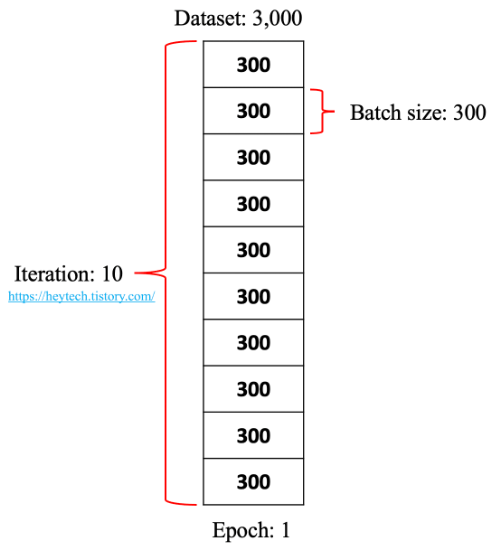

In [ ]:
# 이미지 변환 모듈 설정
# Tensor 형태로 변환
transform = transforms.Compose([
    transforms.ToTensor()
])

# 데이터 불러오기
trainset = datasets.FashionMNIST(
    root      = './.data/', # 저장 경로
    train     = True,       # 학습용 데이터
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/', # 저장 경로
    train     = False,      # 테스트용 데이터
    download  = True,
    transform = transform
)

train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
)
test_loader = torch.utils.data.DataLoader(
    dataset     = testset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
)

In [ ]:
# 각 데이터셋의 형태 확인
print(trainset)
print(testset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./.data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./.data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [ ]:
# train_loader에 대한 반복자(iterator) 생성해, 데이터에 순차적으로 접근함
dataiter       = iter(train_loader)

# 반복 순서에 따라, 이미지 데이터와 레이블 데이터 불러오기
images, labels = next(dataiter)

print(labels)

tensor([7, 1, 2, 2, 3, 9, 2, 4, 2, 0, 3, 5, 3, 4, 3, 2, 6, 2, 4, 4, 0, 8, 0, 4,
        8, 2, 4, 3, 5, 5, 2, 0, 0, 0, 0, 8, 1, 9, 2, 1, 5, 3, 8, 8, 2, 2, 0, 5,
        8, 6, 3, 1, 1, 5, 5, 2, 6, 0, 2, 3, 2, 2, 6, 3])


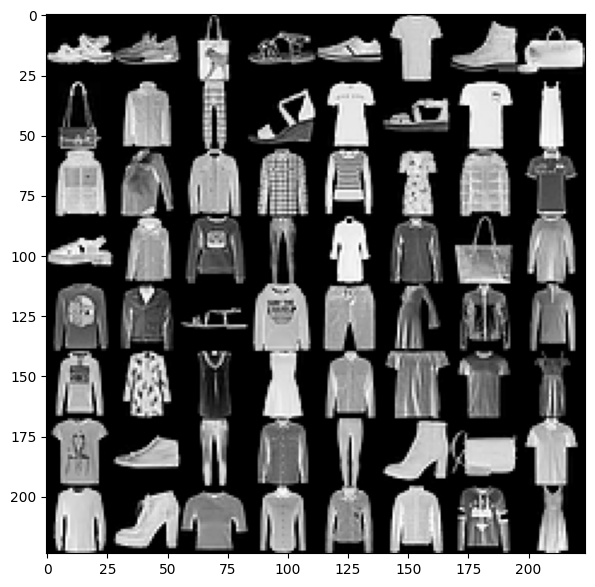

In [ ]:
# 다수의 이미지를 grid 형태로 그리기
img   = utils.make_grid(images, padding=0)  # padding: 이미지 간 여백
npimg = img.numpy()
plt.figure(figsize=(10, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))    # 이미지 배열의 축 변환: (Channel, Height, Width) -> (Height, Width, Channel)
plt.show()

In [ ]:
# 각 class 이름 설정
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# label 별 이름 출력
for label in labels:
    index = label.item()   # item(): 정수 값을 int 타입으로 변환해 저장
    print(CLASSES[index])

Sneaker
Trouser
Pullover
Pullover
Dress
Ankle boot
Pullover
Coat
Pullover
T-shirt/top
Dress
Sandal
Dress
Coat
Dress
Pullover
Shirt
Pullover
Coat
Coat
T-shirt/top
Bag
T-shirt/top
Coat
Bag
Pullover
Coat
Dress
Sandal
Sandal
Pullover
T-shirt/top
T-shirt/top
T-shirt/top
T-shirt/top
Bag
Trouser
Ankle boot
Pullover
Trouser
Sandal
Dress
Bag
Bag
Pullover
Pullover
T-shirt/top
Sandal
Bag
Shirt
Dress
Trouser
Trouser
Sandal
Sandal
Pullover
Shirt
T-shirt/top
Pullover
Dress
Pullover
Pullover
Shirt
Dress


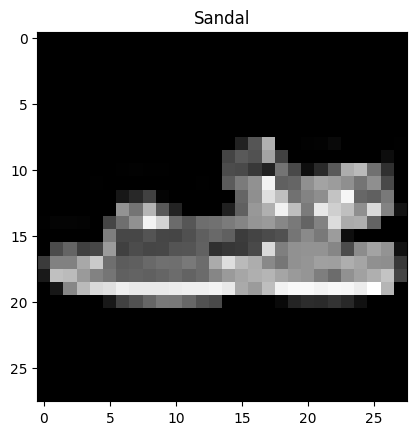

In [ ]:
# 첫 번째 이미지 출력
idx = 1

item_img = images[idx]
item_npimg = item_img.squeeze().numpy()  # squeeze(): 불필요한 차원 제거를 목적으로 (1, Height, Width) -> (Height, Width)로 차원 변환

plt.title(CLASSES[labels[idx].item()])
plt.imshow(item_npimg, cmap='gray')
plt.show()

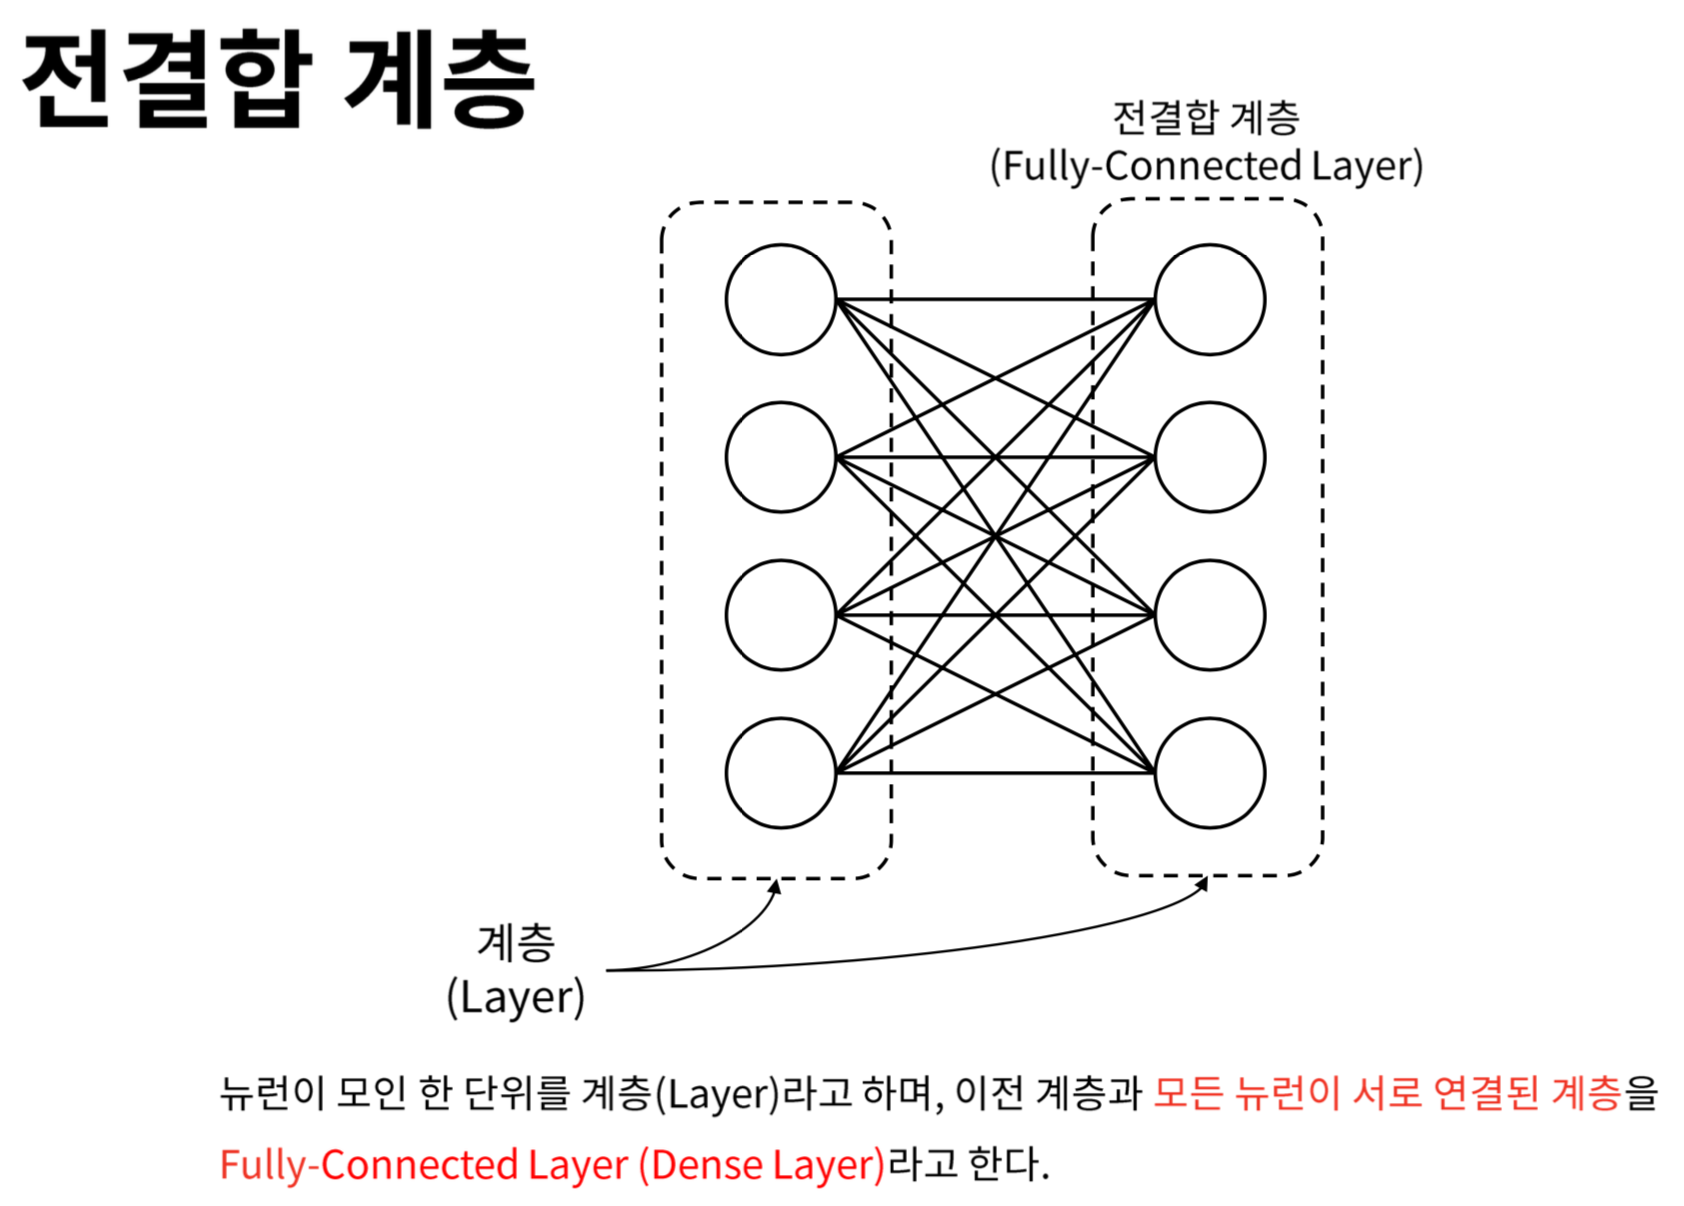

In [ ]:
# ANN 클래스
# Hidden layer 3개 가지는 ANN 모델 구조 정의
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### **Optimizer 정의**
* Stochastic Gradient Descent (SGD): 현재 위치에서 기울어진 방향이 전체적인 최솟값과 다른 방향을 가리키므로, 지그재그 모양으로 탐색

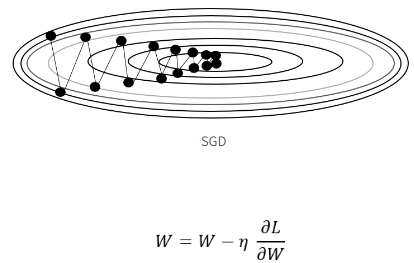

In [ ]:
model        = Net().to(DEVICE)
optimizer    = optim.SGD(model.parameters(), lr=0.01)

## *cross_entropy loss:*

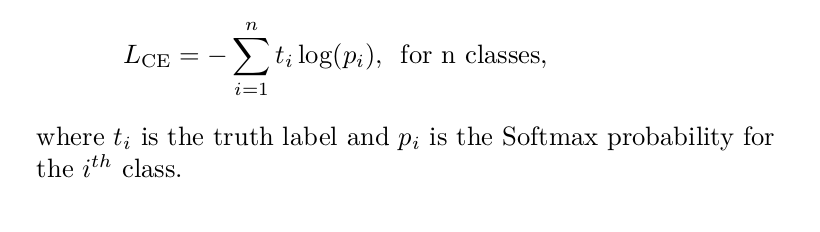

In [ ]:
# 모델 학습을 위한 train 함수 정의

def train(model, train_loader, optimizer):
    # 모델 학습 준비
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):

        # 배치 단위로 학습 데이터를 가져온 후, DEVICE의 메모리로 보냄
        data, target = data.to(DEVICE), target.to(DEVICE)

        # gradient 초기화
        optimizer.zero_grad()
        # 출력 계산
        output = model(data)
        # Cross entropy loss 계산
        loss = F.cross_entropy(output, target)
        # loss에 대한 gradient 역전파(backpropagation)
        loss.backward()
        # 계산된 gradient 기반으로 모델의 파라미터 업데이트
        optimizer.step()

In [ ]:
# 모델 검증을 위한 test 함수 정의

def evaluate(model, test_loader):
    # 모델 검증 준비
    model.eval()
    test_loss = 0
    correct = 0

    # gradient 연산 불가한 상태로 변경 (속도와 효율성 높이기 위함)
    with torch.no_grad():
        for data, target in test_loader:
            # 배치 단위로 학습 데이터를 가져온 후, DEVICE의 메모리로 보냄
            data, target = data.to(DEVICE), target.to(DEVICE)
            # 출력 계산
            output = model(data)

            # 모든 오차 합산
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()

            # 예측 결과 합산
            pred = output.max(1, keepdim=True)[1]                 # 가장 큰 값을 가진 클래스를 예측 값으로 산출
            correct += pred.eq(target.view_as(pred)).sum().item() # 예측과 정답을 비교해, 일치할 경우 correct에 1을 더함

    # 테스트셋에 대한 loss와 accuracy 계산
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
# 학습 및 검증 결과 모니터링
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)

    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

[1] Test Loss: 0.8329, Accuracy: 66.98%
[2] Test Loss: 0.6864, Accuracy: 75.18%
[3] Test Loss: 0.5771, Accuracy: 79.91%
[4] Test Loss: 0.5427, Accuracy: 80.75%
[5] Test Loss: 0.5080, Accuracy: 81.98%
[6] Test Loss: 0.4931, Accuracy: 82.61%
[7] Test Loss: 0.4875, Accuracy: 82.77%
[8] Test Loss: 0.5066, Accuracy: 81.30%
[9] Test Loss: 0.4645, Accuracy: 83.75%
[10] Test Loss: 0.5056, Accuracy: 81.34%
[11] Test Loss: 0.4676, Accuracy: 83.67%
[12] Test Loss: 0.4423, Accuracy: 84.35%
[13] Test Loss: 0.4332, Accuracy: 84.72%
[14] Test Loss: 0.4394, Accuracy: 84.23%
[15] Test Loss: 0.4223, Accuracy: 85.12%
[16] Test Loss: 0.4272, Accuracy: 85.15%
[17] Test Loss: 0.4120, Accuracy: 85.45%
[18] Test Loss: 0.4195, Accuracy: 85.26%
[19] Test Loss: 0.4181, Accuracy: 85.07%
[20] Test Loss: 0.4022, Accuracy: 85.70%
[21] Test Loss: 0.3965, Accuracy: 85.93%
[22] Test Loss: 0.3940, Accuracy: 85.98%
[23] Test Loss: 0.3982, Accuracy: 85.80%
[24] Test Loss: 0.3838, Accuracy: 86.39%
[25] Test Loss: 0.3905, A

## *Confusion Matrix:*

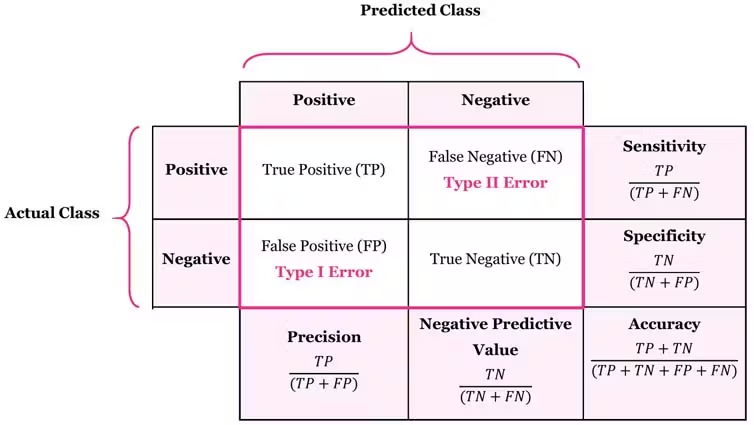

In [ ]:
# 모델 검증
model.eval()
y_true = []
y_pred = []

# testset에 대한 순차적 접근 후, 정답과 모델 기반 예측값 저장
for images, labels in test_loader:
    images = images.to(DEVICE)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    y_pred.extend(predicted.cpu().numpy())
    y_true.extend(labels.cpu().numpy())

y_true_tensor = torch.tensor(y_true)
y_pred_tensor = torch.tensor(y_pred)

# Precision, recall, F1 score 등 평가 지표 산출
TP = ((y_pred_tensor == 1) & (y_true_tensor == 1)).sum().item()
FP = ((y_pred_tensor == 1) & (y_true_tensor == 0)).sum().item()
FN = ((y_pred_tensor == 0) & (y_true_tensor == 1)).sum().item()

precision = TP / (TP + FP) if TP + FP > 0 else 0
recall = TP / (TP + FN) if TP + FN > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 1.0
Recall: 0.9937952430196484
F1 Score: 0.9968879668049793


# **2. Other techniques for regularization in ANN**

### **Regularization Technique: Augmentation**

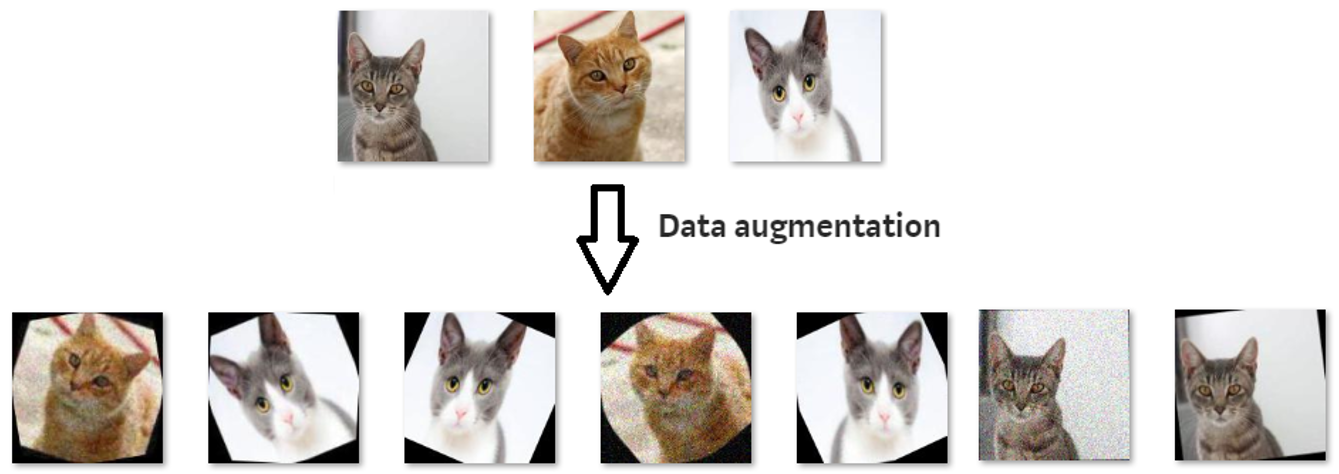

In [ ]:
# 데이터 불러오기
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                       transforms.RandomHorizontalFlip(),         # 데이터 증강/변환: 무작위로 이미지 뒤집기 (수평 방향)
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,)) # 정규화 (평균, 표준편차)
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                   train=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
# ANN 클래스
# Hidden layer 3개 가지는 ANN 모델 구조 정의
class Net(nn.Module):
    def __init__(self, dropout_p=0.2):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        # dropout 설정 (p 확률 기준)
        self.dropout_p = dropout_p

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        # dropout
        x = F.dropout(x, training=self.training,
                      p=self.dropout_p)
        x = F.relu(self.fc2(x))
        # dropout
        x = F.dropout(x, training=self.training,
                      p=self.dropout_p)
        x = self.fc3(x)
        return x

### **Regularization Technique: Dropout**

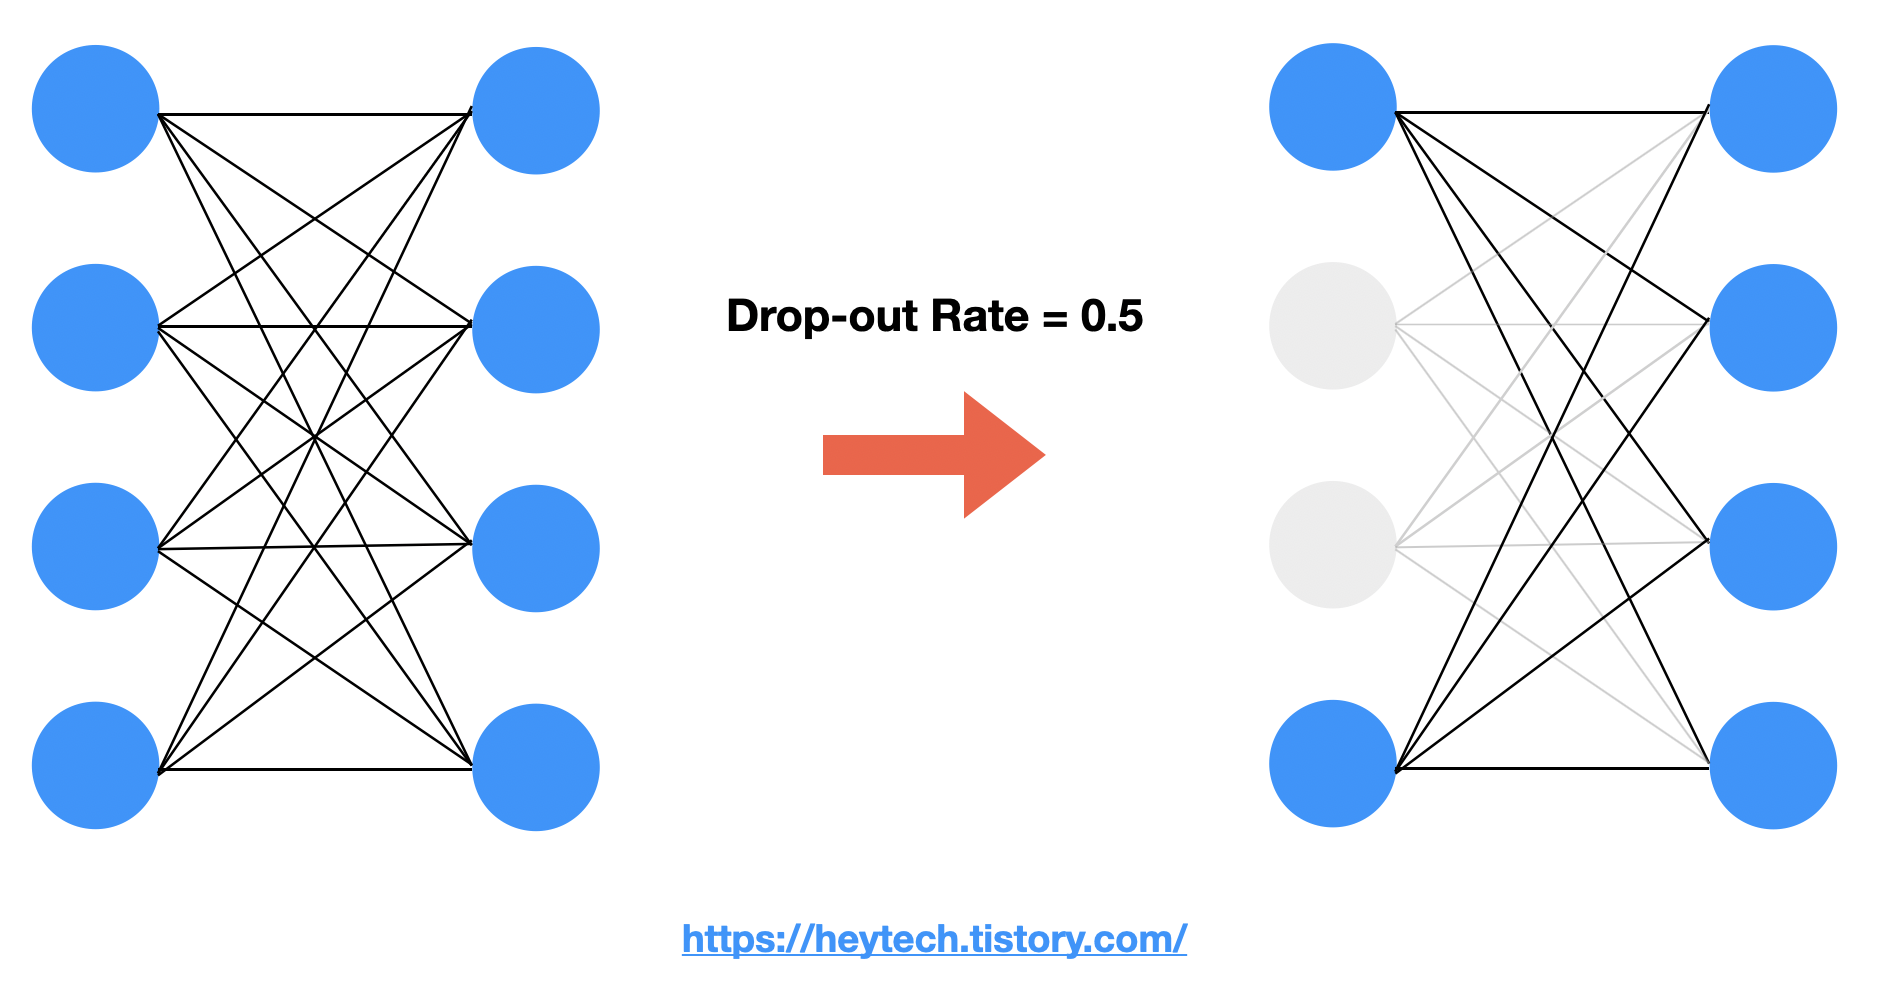

In [ ]:
# 0.2 확률로 dropout 하는 모델 구조 정의
model        = Net(dropout_p=0.2).to(DEVICE)

# SGD optimizer 정의
optimizer    = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
# 모델 학습을 위한 train 함수 정의
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [ ]:
# 모델 검증읠 위한 test 함수 정의
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()

            # 정답, 예측 값 기준으로 correct 비율 측정
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    # 검증 loss 확인
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
# 학습 및 테스트 성능 모니터링
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)

    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

[1] Test Loss: 0.6370, Accuracy: 77.04%
[2] Test Loss: 0.5288, Accuracy: 81.01%
[3] Test Loss: 0.4904, Accuracy: 81.63%
[4] Test Loss: 0.4584, Accuracy: 83.39%
[5] Test Loss: 0.4399, Accuracy: 83.91%
[6] Test Loss: 0.4240, Accuracy: 84.66%
[7] Test Loss: 0.4134, Accuracy: 85.01%
[8] Test Loss: 0.4086, Accuracy: 85.20%
[9] Test Loss: 0.3982, Accuracy: 85.78%
[10] Test Loss: 0.3904, Accuracy: 85.67%
[11] Test Loss: 0.3846, Accuracy: 85.90%
[12] Test Loss: 0.3738, Accuracy: 86.30%
[13] Test Loss: 0.3823, Accuracy: 86.03%
[14] Test Loss: 0.3729, Accuracy: 86.68%
[15] Test Loss: 0.3616, Accuracy: 86.72%
[16] Test Loss: 0.3706, Accuracy: 86.56%
[17] Test Loss: 0.3583, Accuracy: 86.93%
[18] Test Loss: 0.3592, Accuracy: 86.70%
[19] Test Loss: 0.3479, Accuracy: 87.38%
[20] Test Loss: 0.3523, Accuracy: 87.25%
[21] Test Loss: 0.3444, Accuracy: 87.45%
[22] Test Loss: 0.3403, Accuracy: 87.83%
[23] Test Loss: 0.3517, Accuracy: 87.02%
[24] Test Loss: 0.3368, Accuracy: 87.90%
[25] Test Loss: 0.3391, A

In [ ]:
# 모델 검증
model.eval()
y_true = []
y_pred = []

for images, labels in test_loader:
    images = images.to(DEVICE)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    y_pred.extend(predicted.cpu().numpy())
    y_true.extend(labels.cpu().numpy())

y_true_tensor = torch.tensor(y_true)
y_pred_tensor = torch.tensor(y_pred)

# Precision, recall, F1 score 값 산출
TP = ((y_pred_tensor == 1) & (y_true_tensor == 1)).sum().item()
FP = ((y_pred_tensor == 1) & (y_true_tensor == 0)).sum().item()
FN = ((y_pred_tensor == 0) & (y_true_tensor == 1)).sum().item()

precision = TP / (TP + FP) if TP + FP > 0 else 0
recall = TP / (TP + FN) if TP + FN > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.9979381443298969
Recall: 0.9979381443298969
F1 Score: 0.9979381443298969
